<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Hough_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries, modules and functions

import cv2
from numpy import cos, sin, pi
import numpy as np
from matplotlib import pyplot as plt

# DEFINE THE VARIABLE imagem LIKE AS AN NDARRAY (N-DIMENSIONAL ARRAY)
# FROM LOADING THE IMAGE CONTAINED IN THE FILE "ESTAGIOPARTE34 - copia.jpg"

imagem = cv2.imread("ESTAGIOPARTE34 - copia.jpg")

In [3]:
# Creation of a list to store the coordinates of the dark pixels in the image

lista_de_coordenadas_imagem = []

# Loop for the storage of the coordinates of the dark pixels

for x in range(0, imagem.shape[1]):  # Scanning of the columns
    for y in range(0, imagem.shape[0]):  # Scanning of the rows
        # Checks if the pixel intensity of the zero channel is less than a certain value
        # to determinate whether this pixel is dark or not
        if (imagem[y,x][0])<20:
            lista_de_coordenadas_imagem.append((x,y)) # Storing dark pixels coordinates

In [4]:
# Construction of the parameters for the pθ plan

# Creation of a variable containing the variation of the theta angle from zero to 360 in radians

theta = np.arange(0,360,0.1)*(pi/180)

# Criation of a list for the p parameter construction

p = []

# Loop for the p parameter construction

for k in range(0,len(lista_de_coordenadas_imagem)):
    # Storage of the values of p
    p.append(lista_de_coordenadas_imagem[k][0]*cos(theta) + lista_de_coordenadas_imagem[k][1]*sin(theta))

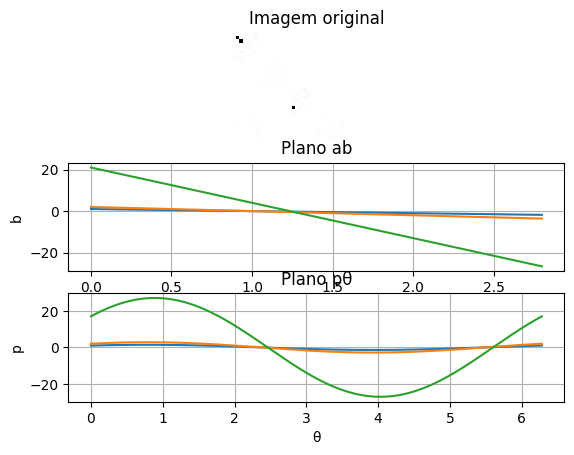

In [8]:
# Plotting the graphs with the intersections

# SETS THE FIGURE SIZE IN INCHES BY ADJUSTING THE WIDGHT AND THE HEIGHT DISPLAYED

figura = plt.figure()

# SETTING THE DISPLAY MODE, WITH THREE IMAGES, ONE ON THE TOP OF THE OTHER

linhas = 3
colunas = 1

# Creating the first subplot to be displayed

figura.add_subplot(linhas, colunas, 1) # SUBPLOT POSITION
plt.imshow(imagem) # DEFINES THE DATA THAT WHILL BE DISPLAYED AS AN IMAGE
plt.axis('off') # Disables the values displayed on the numeric axes
plt.title("Imagem original") # Image title

# Creating the second subplot to be displayed

figura.add_subplot(linhas, colunas, 2) # IMAGE WILL BE IN POSITION 2

# ab plan

# Creation of the abscissa axis variable in the ab plan

a = np.arange(0,2.9,0.1)

# Loop for the creation and sobreposition of the straights in the ab plan
# When there's intersection between straights in the ab plan, it means that relationed image points to these straights intersect themself

for r in range (0,len(lista_de_coordenadas_imagem)):
    plt.plot(a, -a*lista_de_coordenadas_imagem[r][0] + lista_de_coordenadas_imagem[r][1]) # plotting straights

plt.title("Plano ab") # Image title
plt.xlabel("a") # Name of the abscissa axis
plt.ylabel("b") # Name of the ordinate axis
plt.grid("on") # Demarcate the screen with lines spread out and aligned with some values of the axis, if these are displayed

# pθ plan

# Creating the thid subplot to be displayed in the same way as the previous one

figura.add_subplot(linhas, colunas, 3) # # IMAGE WILL BE IN POSITION 3

for r in range (0,len(p)):
    plt.plot(theta,p[r])

plt.title("Plano pθ")
plt.xlabel("θ")
plt.ylabel("p")
plt.grid("on")

# Display of subplots

plt.show()